In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_08.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


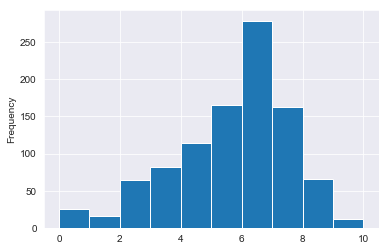

In [2]:
df_08['greenhouse_gas_score'].plot.hist();

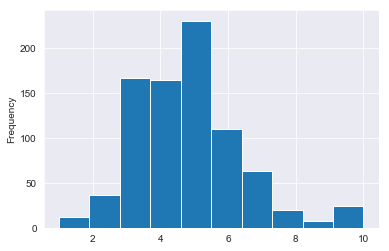

In [3]:
df_18['greenhouse_gas_score'].plot.hist();

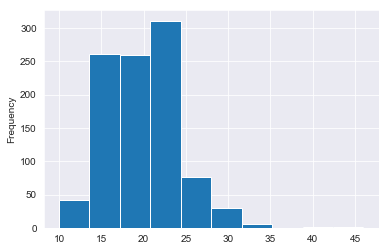

In [4]:
df_08['cmb_mpg'].plot.hist();

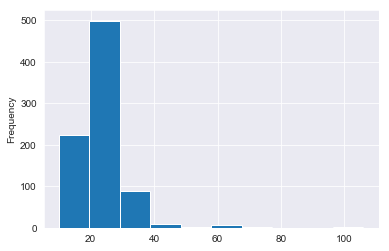

In [5]:
df_18['cmb_mpg'].plot.hist();

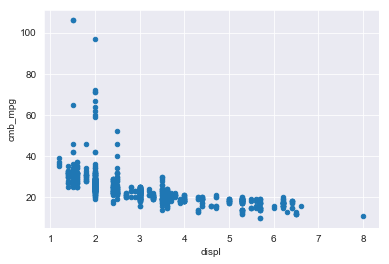

In [6]:
df_18.plot(x='displ', y = 'cmb_mpg', kind='scatter');

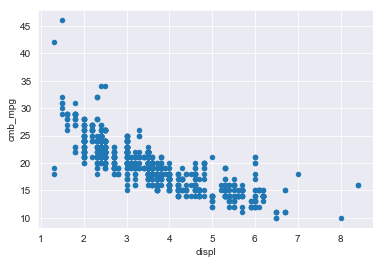

In [7]:
df_08.plot(x='displ', y = 'cmb_mpg', kind='scatter');

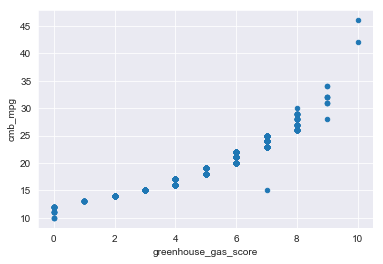

In [8]:
df_08.plot(x='greenhouse_gas_score', y = 'cmb_mpg', kind='scatter');

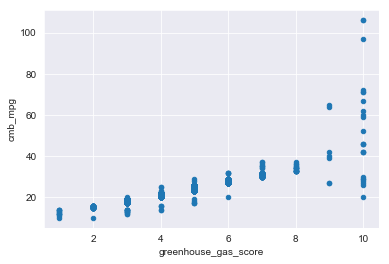

In [9]:
df_18.plot(x='greenhouse_gas_score', y = 'cmb_mpg', kind='scatter');

In [10]:
#Now I have to answer the following question with a chart: How much have vehicle classes improved in fuel economy (increased in mpg)?
df_18.veh_class.unique()

array(['small SUV', 'small car', 'midsize car', 'large car',
       'standard SUV', 'station wagon', 'pickup', 'special purpose',
       'minivan'], dtype=object)

In [11]:
df_08.veh_class.unique()
#just noticed there are different unique values for the 2008 and 2018 data set

array(['SUV', 'midsize car', 'small car', 'station wagon', 'large car',
       'minivan', 'van', 'pickup'], dtype=object)

In [12]:
df_18_suv = df_18.query('veh_class == "small SUV"')
df_18_suv.head(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
27,AUDI Q5,2.0,4,SemiAuto-7,4WD,Gasoline,small SUV,3.0,23.0,27.0,25.0,5,No


In [13]:
df_18_standardsuv = df_18.query('veh_class == "standard SUV"')
df_18_suv = df_18_suv.append(df_18_standardsuv, ignore_index=True)
df_18_suv.veh_class.unique()

array(['small SUV', 'standard SUV'], dtype=object)

In [14]:
df_18_suv['veh_class'] = df_18_suv['veh_class'].map({'small SUV': 'SUV', 'standard SUV': 'SUV'})
df_18_suv.veh_class.unique()

array(['SUV'], dtype=object)

In [15]:
df_18 = df_18.query('veh_class != "special purpose"')
df_08 = df_08.query('veh_class != "van"')

In [16]:
df_18['veh_class'].unique()

array(['small SUV', 'small car', 'midsize car', 'large car',
       'standard SUV', 'station wagon', 'pickup', 'minivan'], dtype=object)

In [17]:
df_08['veh_class'].unique()
#checking to see if these values are truly gone

array(['SUV', 'midsize car', 'small car', 'station wagon', 'large car',
       'minivan', 'pickup'], dtype=object)

In [18]:
#need to remove two more values
df_18 = df_18.query('veh_class != "small SUV"')
df_18 = df_18.query('veh_class != "standard SUV"')
df_18['veh_class'].unique()

array(['small car', 'midsize car', 'large car', 'station wagon', 'pickup',
       'minivan'], dtype=object)

In [19]:
df_18_suv.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI Q5,2.0,4,SemiAuto-7,4WD,Gasoline,SUV,3.0,23.0,27.0,25.0,5,No
3,AUDI SQ5,3.0,6,AMS-8,4WD,Gasoline,SUV,5.0,19.0,24.0,21.0,4,No
4,BMW X4 M40i,3.0,6,SemiAuto-8,4WD,Gasoline,SUV,3.0,18.0,25.0,21.0,4,No


In [20]:
df_18.shape

(628, 13)

In [21]:
df_18_suv.shape

(194, 13)

In [22]:
df_18 = df_18.append(df_18_suv, ignore_index = True)
df_18.shape

(822, 13)

In [23]:
df_18.veh_class.unique()

array(['small car', 'midsize car', 'large car', 'station wagon', 'pickup',
       'minivan', 'SUV'], dtype=object)

In [24]:
df_08.veh_class.unique()

array(['SUV', 'midsize car', 'small car', 'station wagon', 'large car',
       'minivan', 'pickup'], dtype=object)

In [25]:
df_18_mean = df_18.groupby('veh_class')['cmb_mpg'].mean()
df_18_mean

veh_class
SUV              21.469072
large car        23.409091
midsize car      27.884058
minivan          20.800000
pickup           18.589744
small car        25.421053
station wagon    27.529412
Name: cmb_mpg, dtype: float64

In [26]:
df_08_mean = df_08.groupby('veh_class')['cmb_mpg'].mean()
df_08_mean

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
Name: cmb_mpg, dtype: float64

In [27]:
#I think I've finally got everything ready to plot!

In [28]:
ind = np.arange(len(df_08_mean)) #the x locations for the groups
width = 0.35 #the width of the bars
ind

array([0, 1, 2, 3, 4, 5, 6])

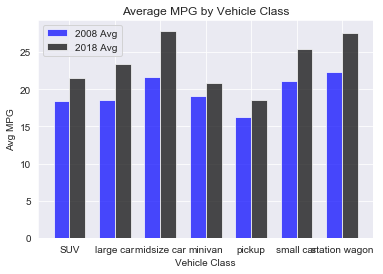

In [29]:
df_08_bar = plt.bar(ind, df_08_mean, width, color = "b", alpha=.7, label='2008 Avg')
df_18_bar = plt.bar(ind + width, df_18_mean, width, color = "k", alpha=.7, label='2018 Avg')
plt.ylabel('Avg MPG')
plt.xlabel('Vehicle Class')
plt.title('Average MPG by Vehicle Class')
plt.legend()
locations = ind + width / 2 #these are the xtick locations
labels = ['SUV', 'large car', 'midsize car', 'minivan', 'pickup', 'small car', 'station wagon']
plt.xticks(locations, labels);
#we have a plot-ish!! Not the best, but good enough for now.